<a href="https://colab.research.google.com/github/phuocthok18/AI_HKI_2022_2023/blob/main/Bt_tuan4_fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 31.4 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=3516ed445d392c87f8737ff1ee2fbaf71faf74652350336d1a83dd1ee47a4aed
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

2707.75626957799


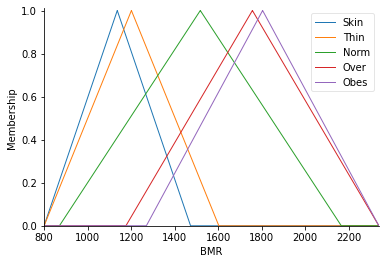

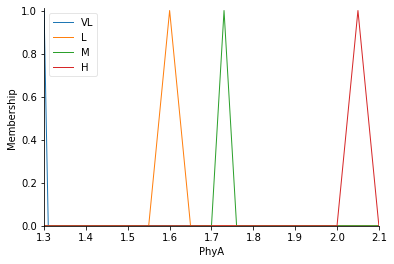

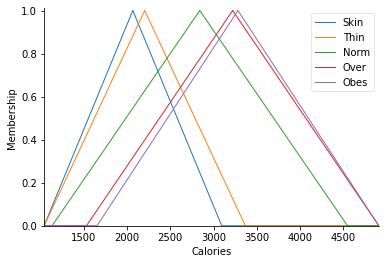

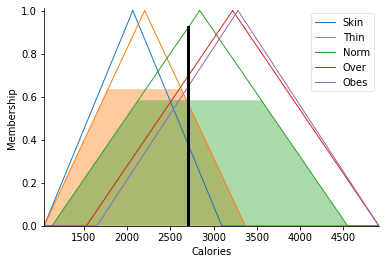

In [ ]:
# Nutritial Needs Recommend
BMR =ctrl.Antecedent(np.arange(799.7,2339.4,0.1),'BMR')
PhyA =ctrl.Antecedent(np.arange(1.3,2.11,0.01),'PhyA')

Calories = ctrl.Consequent(np.arange(1038.7,4912.6,0.1),'Calories')

BMR['Skin'] = fuzz.trimf(BMR.universe,[799.7,1136.3,1472.9])
BMR['Thin'] = fuzz.trimf(BMR.universe,[799.7,1201.3,1602.9])
BMR['Norm'] = fuzz.trimf(BMR.universe,[870.2,1518.1,2166])
BMR['Over'] = fuzz.trimf(BMR.universe,[1176,1757.7,2339.3])
BMR['Obes'] = fuzz.trimf(BMR.universe,[1270,1804.7,2339.3])

PhyA['VL'] = fuzz.trimf(PhyA.universe,[1.3,1.3,1.3])
PhyA['L'] = fuzz.trimf(PhyA.universe,[1.55,1.6,1.65])
PhyA['M'] = fuzz.trimf(PhyA.universe,[1.7,1.73,1.76])
PhyA['H'] = fuzz.trimf(PhyA.universe,[2,2.05,2.1])

Calories['Skin'] = fuzz.trimf(Calories.universe,[1038.7,2065.5,3093.1])
Calories['Thin'] = fuzz.trimf(Calories.universe,[1039.6,2202.9,3366.1])
Calories['Norm'] = fuzz.trimf(Calories.universe,[1131.3,2839.9,4548.6])
Calories['Over'] = fuzz.trimf(Calories.universe,[1528.8,3220.7,4912.5])
Calories['Obes'] = fuzz.trimf(Calories.universe,[1651,3281.8,4912.5])

BMR.view()
PhyA.view()
Calories.view()

rule1 =  ctrl.Rule(BMR['Skin']&PhyA['VL'],Calories['Over'])
rule2 =  ctrl.Rule(BMR['Skin']&PhyA['L'],Calories['Obes'])
rule3 =  ctrl.Rule(BMR['Skin']&PhyA['M'],Calories['Obes'])
rule4 =  ctrl.Rule(BMR['Skin']&PhyA['H'],Calories['Obes'])
rule5 =  ctrl.Rule(BMR['Thin']&PhyA['VL'],Calories['Norm'])
rule6 =  ctrl.Rule(BMR['Thin']&PhyA['L'],Calories['Over'])
rule7 =  ctrl.Rule(BMR['Thin']&PhyA['M'],Calories['Obes'])
rule8 =  ctrl.Rule(BMR['Thin']&PhyA['H'],Calories['Obes'])
rule9 =  ctrl.Rule(BMR['Norm']&PhyA['VL'],Calories['Norm'])
rule10 = ctrl.Rule(BMR['Norm']&PhyA['L'],Calories['Norm'])
rule11 = ctrl.Rule(BMR['Norm']&PhyA['M'],Calories['Over'])
rule12 = ctrl.Rule(BMR['Norm']&PhyA['H'],Calories['Obes'])
rule13 = ctrl.Rule(BMR['Over']&PhyA['VL'],Calories['Thin'])
rule14 = ctrl.Rule(BMR['Over']&PhyA['L'],Calories['Norm'])
rule15 = ctrl.Rule(BMR['Over']&PhyA['M'],Calories['Norm'])
rule16 = ctrl.Rule(BMR['Over']&PhyA['H'],Calories['Over'])
rule17 = ctrl.Rule(BMR['Obes']&PhyA['VL'],Calories['Skin'])
rule18 = ctrl.Rule(BMR['Obes']&PhyA['L'],Calories['Thin'])
rule19 = ctrl.Rule(BMR['Obes']&PhyA['M'],Calories['Norm'])
rule20 = ctrl.Rule(BMR['Obes']&PhyA['H'],Calories['Norm'])

C_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20])
C= ctrl.ControlSystemSimulation(C_ctrl)
C.input['BMR'] = 2000
C.input['PhyA'] = 1.6
C.compute()
print(C.output['Calories'])
Calories.view(sim=C)
# Kcal

6.0
# 6.0 nam trong cap do 2 su ua thich


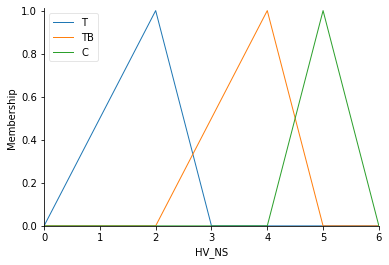

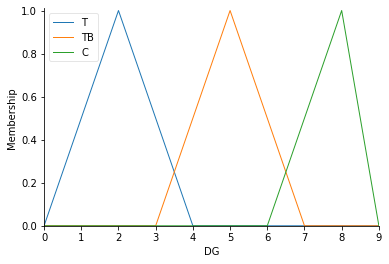

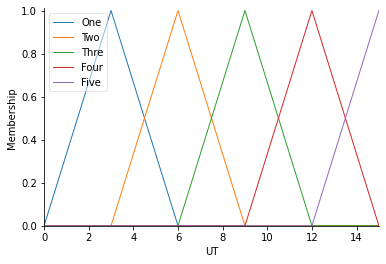

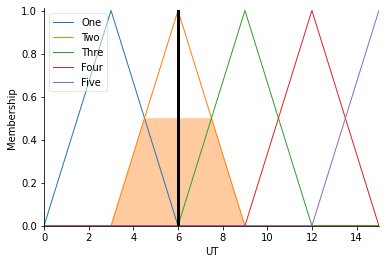

In [ ]:
# Adaptive Food Suggestion Engine 
HV_NS =ctrl.Antecedent(np.arange(0,7,1),'HV_NS')
DG =ctrl.Antecedent(np.arange(0,10,1),'DG')

UT = ctrl.Consequent(np.arange(0,16,1),'UT')

HV_NS['T'] = fuzz.trimf(HV_NS.universe,[0,2,3])
HV_NS['TB'] = fuzz.trimf(HV_NS.universe,[2,4,5])
HV_NS['C'] = fuzz.trimf(HV_NS.universe,[4,5,6])

DG['T'] = fuzz.trimf(DG.universe,[0,2,4])
DG['TB'] = fuzz.trimf(DG.universe,[3,5,7])
DG['C'] = fuzz.trimf(DG.universe,[6,8,9])

UT['One'] = fuzz.trimf(UT.universe,[0,3,6])
UT['Two'] = fuzz.trimf(UT.universe,[3,6,9])
UT['Thre'] = fuzz.trimf(UT.universe,[6,9,12])
UT['Four'] = fuzz.trimf(UT.universe,[9,12,15])
UT['Five'] = fuzz.trimf(UT.universe,[12,15,20])


HV_NS.view()
DG.view()
UT.view()

rule1 =  ctrl.Rule(HV_NS['T']&DG['T'],UT['One'])
rule2 =  ctrl.Rule(HV_NS['T']&DG['TB'],UT['Two'])
rule3 =  ctrl.Rule(HV_NS['T']&DG['C'],UT['Thre'])
rule4 =  ctrl.Rule(HV_NS['TB']&DG['T'],UT['Two'])
rule5 =  ctrl.Rule(HV_NS['TB']&DG['TB'],UT['Thre'])
rule6 =  ctrl.Rule(HV_NS['TB']&DG['C'],UT['Four'])
rule7 =  ctrl.Rule(HV_NS['C']&DG['T'],UT['Thre'])
rule8 =  ctrl.Rule(HV_NS['C']&DG['TB'],UT['Four'])
rule9 =  ctrl.Rule(HV_NS['C']&DG['C'],UT['Five'])

UT_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
R = ctrl.ControlSystemSimulation(UT_ctrl)
R.input['HV_NS'] = 3
R.input['DG'] = 3
R.compute()
print(R.output['UT'])
UT.view(sim=R)
print('# 6.0 nam trong cap do 2 su ua thich')